In [1]:
import sys
import os
sys.path.append('../../mrnet')

import numpy as np
import shutil
import cv2
from PIL import Image
import pdb
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

import torch
from torch.nn import functional as F
from torchvision import models, transforms

from model import MRNet 
from loader import load_data
from tqdm.notebook import tqdm
from Cams import CreateCamOverlay, CreatePatientDictionary

In [2]:
planes = ["axial", "sagittal", "coronal"]
task = "acl"
slices = []
cams = []
cam_dict = {}
case_index = 10

In [3]:
patients = CreatePatientDictionary('meniscus',planes[0])
patients[case_index]

{'mri': tensor([[[[[-0.9871, -1.0273, -0.9871,  ..., -1.0072, -1.0072, -1.0877],
            [-1.1279, -0.8464, -0.8062,  ..., -1.0475, -0.9871, -1.0475],
            [-0.9469, -0.9268, -1.1480,  ..., -1.0475, -1.0676, -1.1279],
            ...,
            [-1.1078, -1.0877, -1.1681,  ...,  0.1792, -0.0219, -0.1024],
            [-1.0877, -1.0475, -0.8866,  ...,  0.0183, -0.0621, -0.0018],
            [-1.1279, -1.1279, -1.0877,  ...,  0.0183, -0.0018, -0.0219]],
 
           [[-0.9871, -1.0273, -0.9871,  ..., -1.0072, -1.0072, -1.0877],
            [-1.1279, -0.8464, -0.8062,  ..., -1.0475, -0.9871, -1.0475],
            [-0.9469, -0.9268, -1.1480,  ..., -1.0475, -1.0676, -1.1279],
            ...,
            [-1.1078, -1.0877, -1.1681,  ...,  0.1792, -0.0219, -0.1024],
            [-1.0877, -1.0475, -0.8866,  ...,  0.0183, -0.0621, -0.0018],
            [-1.1279, -1.1279, -1.0877,  ...,  0.0183, -0.0018, -0.0219]],
 
           [[-0.9871, -1.0273, -0.9871,  ..., -1.0072, -1.0072, -

In [4]:
for plane in planes:
    patients = CreatePatientDictionary(task,plane)
    case = patients[case_index]
    temp={}
    slices, cams = CreateCamOverlay(case, case_index, task, plane)
    temp["slices"] = slices
    temp["cams"] = cams
    cam_dict[plane] = temp

In [5]:
def f(slice_index, p):
    case_slice_plot.imshow(cam_dict[p]["slices"][slice_index])
    case_cam_plot.imshow(cam_dict[p]["cams"][slice_index])
    fig.canvas.draw()
    display(fig)

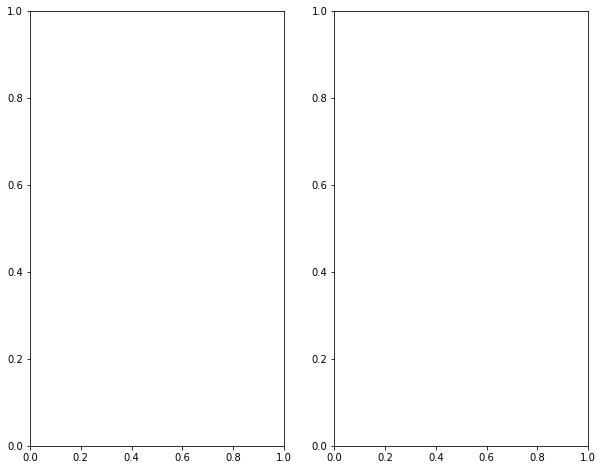

In [8]:
fig = plt.figure(figsize=(10, 8))
case_slice_plot = fig.add_subplot(121) 
case_cam_plot = fig.add_subplot(122) 

In [9]:
for plane in cam_dict.keys():
        interact(f, slice_index=widgets.IntSlider(min=0,max=len(cam_dict[plane]["slices"])-1,step=1,value=0), p=plane);

interactive(children=(IntSlider(value=0, description='slice_index', max=23), Text(value='axial', description='…

interactive(children=(IntSlider(value=0, description='slice_index', max=23), Text(value='sagittal', descriptio…

interactive(children=(IntSlider(value=0, description='slice_index', max=16), Text(value='coronal', description…